<a href="https://colab.research.google.com/github/StefTse/AIDL_xrcises/blob/main/AIDL_%CE%92_CS02_0035.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### University of West Attica
## MSc in Artificial Intelligence & Deep Learning

###Assignment for AIDL_Β_CS02: Artificial Intelligence in Healthcare and Biometrics


### Stefanos Tsemperlidis
#### mscaidl-0035@uniwa.gr

##Classification of cardiotocograms with machine learning models

In [ ]:
#import libraries & data from excel file

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_excel('/content/CTG_dataset.xlsx', engine='openpyxl')

In [ ]:
# read data headers, shape and a short view of the dataset
print(data.columns)
print('')
print(data.shape)
data.head()

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE',
       'LD', 'FS', 'SUSP', 'CLASS', 'NSP', 'start_instant', 'end_instant'],
      dtype='object')

(2129, 35)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,E,AD,DE,LD,FS,SUSP,CLASS,NSP,start_instant,end_instant
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,2.0,240.0,357.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0,5.0,632.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0,177.0,779.0
3,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0,411.0,1192.0
4,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0,533.0,1147.0


In [ ]:
data.dtypes

LB               float64
AC               float64
FM               float64
UC               float64
DL               float64
DS               float64
DP               float64
ASTV             float64
MSTV             float64
ALTV             float64
MLTV             float64
Width            float64
Min              float64
Max              float64
Nmax             float64
Nzeros           float64
Mode             float64
Mean             float64
Median           float64
Variance         float64
Tendency         float64
A                float64
B                float64
C                float64
D                float64
E                float64
AD               float64
DE               float64
LD               float64
FS               float64
SUSP             float64
CLASS            float64
NSP              float64
start_instant    float64
end_instant      float64
dtype: object

In [ ]:
# create a new dataset with the 21 features and the target variable (NSP)
CTG_data=data[['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency','NSP']]
CTG_data.shape

(2129, 22)

In [ ]:
# Rename features according to dataset information
CTG_data.columns=['baseline', 'accelarations', 'fetal_movements', 'uterine_contractions','light_decelerations', 'severe_decelerations','prolonged_decelerations',
                'abnormal_short_term_variability','mean_short_term_variability',
                '%_time_abnormal_long_term_variability','mean_long_term_variability', 'histogram_width','histogram_min','histogram_max','#_histogram_peaks',
                '#_histogram_zeros', 'histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency','fetal_state']

In [ ]:
#drop missing values
CTG_data_02=CTG_data.dropna()
CTG_data_02.isnull().sum()

baseline                                 0
accelarations                            0
fetal_movements                          0
uterine_contractions                     0
light_decelerations                      0
severe_decelerations                     0
prolonged_decelerations                  0
abnormal_short_term_variability          0
mean_short_term_variability              0
%_time_abnormal_long_term_variability    0
mean_long_term_variability               0
histogram_width                          0
histogram_min                            0
histogram_max                            0
#_histogram_peaks                        0
#_histogram_zeros                        0
histogram_mode                           0
histogram_mean                           0
histogram_median                         0
histogram_variance                       0
histogram_tendency                       0
fetal_state                              0
dtype: int64

In [ ]:
# Count the instances of the three classes (targets). We have an imbalanced dataset. 

print('Instances per class')
print(CTG_data_02['fetal_state'].value_counts())
x=CTG_data_02['fetal_state'].value_counts()
y=(x/2126)*100
print('Class percentage (%)')
print(round(y,0))
print('')
print( "1: Normal, 2: Suspected, 3: Pathological")
print('')

Instances per class
1.0    1655
2.0     295
3.0     176
Name: fetal_state, dtype: int64
Class percentage (%)
1.0    78.0
2.0    14.0
3.0     8.0
Name: fetal_state, dtype: float64

1: Normal, 2: Suspected, 3: Pathological



In [ ]:
#descriptive statistcs
CTG_data_02.describe()

,baseline,accelarations,fetal_movements,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_short_term_variability,%_time_abnormal_long_term_variability,...,histogram_min,histogram_max,#_histogram_peaks,#_histogram_zeros,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_state
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


array([[<AxesSubplot:title={'center':'baseline'}>,
        <AxesSubplot:title={'center':'accelarations'}>,
        <AxesSubplot:title={'center':'fetal_movements'}>,
        <AxesSubplot:title={'center':'uterine_contractions'}>,
        <AxesSubplot:title={'center':'light_decelerations'}>],
       [<AxesSubplot:title={'center':'severe_decelerations'}>,
        <AxesSubplot:title={'center':'prolonged_decelerations'}>,
        <AxesSubplot:title={'center':'abnormal_short_term_variability'}>,
        <AxesSubplot:title={'center':'mean_short_term_variability'}>,
        <AxesSubplot:title={'center':'%_time_abnormal_long_term_variability'}>],
       [<AxesSubplot:title={'center':'mean_long_term_variability'}>,
        <AxesSubplot:title={'center':'histogram_width'}>,
        <AxesSubplot:title={'center':'histogram_min'}>,
        <AxesSubplot:title={'center':'histogram_max'}>,
        <AxesSubplot:title={'center':'#_histogram_peaks'}>],
       [<AxesSubplot:title={'center':'#_histogram_zeros

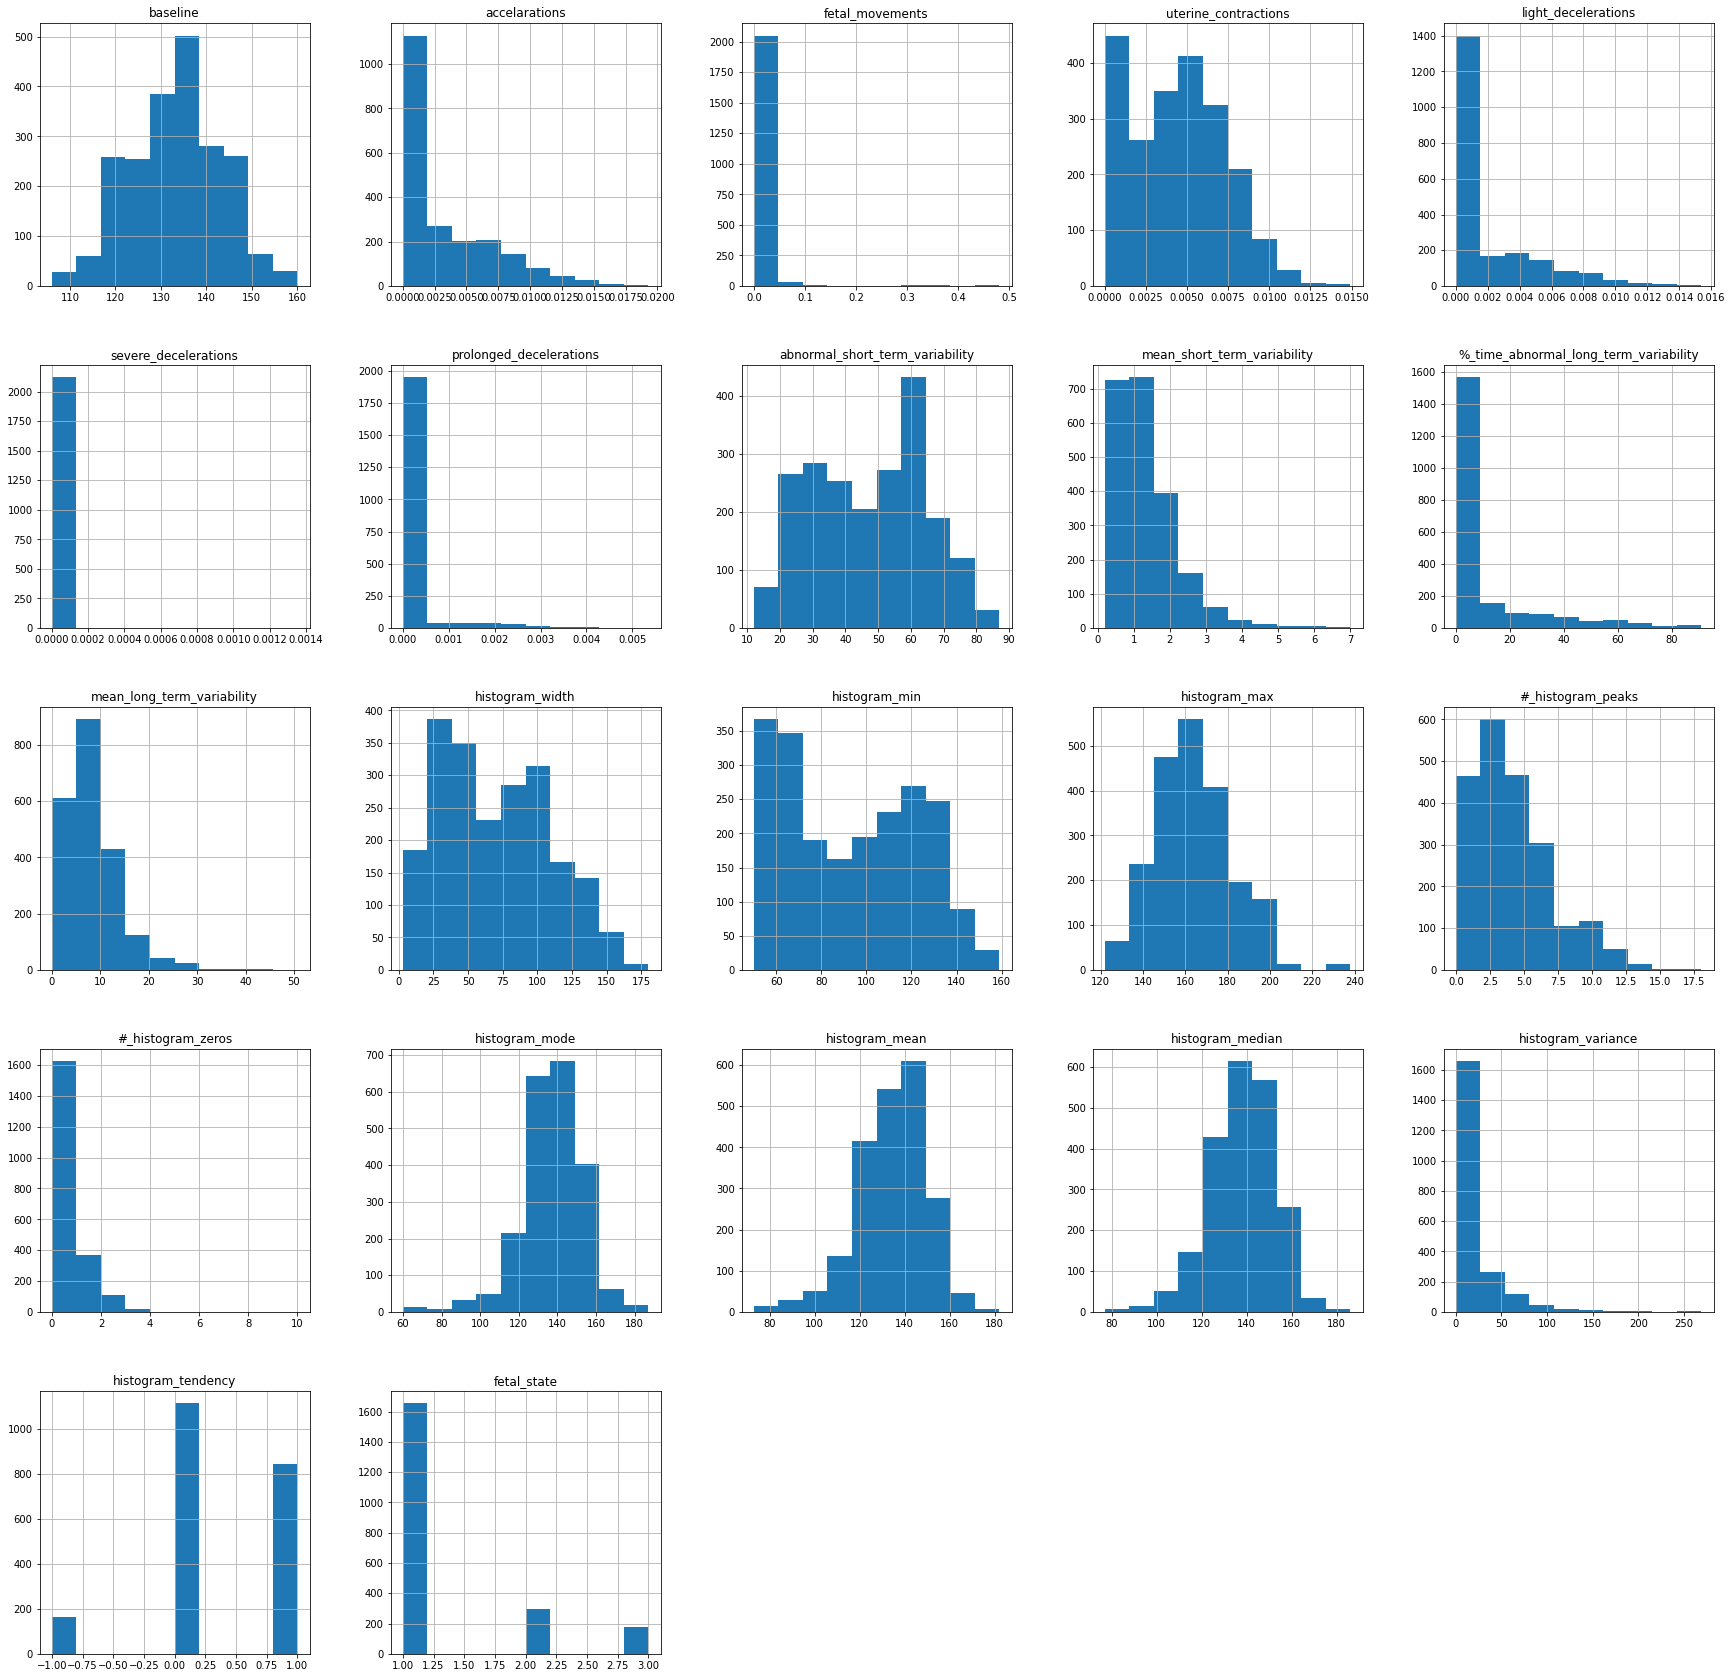

In [ ]:
# Histogram distributions of the features
CTG_data_02.hist(bins=10, figsize=(30, 30))

In [ ]:
#Variables normalization
from sklearn.preprocessing import MinMaxScaler
CTG_data_norm=CTG_data_02.copy()
cols_to_norm = ['baseline','abnormal_short_term_variability',
'mean_short_term_variability', '%_time_abnormal_long_term_variability',
'mean_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', '#_histogram_peaks', 
'#_histogram_zeros', 'histogram_mode', 'histogram_mean', 'histogram_median','histogram_variance']
CTG_data_norm[cols_to_norm]= MinMaxScaler().fit_transform(CTG_data_norm[cols_to_norm])

print(CTG_data_norm.shape)
CTG_data_norm.head()

(2126, 22)


,baseline,accelarations,fetal_movements,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_short_term_variability,%_time_abnormal_long_term_variability,...,histogram_min,histogram_max,#_histogram_peaks,#_histogram_zeros,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_state
0,0.259259,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.813333,0.044118,0.472527,...,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0,2.0
1,0.481481,0.006380,0.0,0.006380,0.003190,0.0,0.0,0.066667,0.279412,0.000000,...,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.0,1.0
2,0.500000,0.003322,0.0,0.008306,0.003322,0.0,0.0,0.053333,0.279412,0.000000,...,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.0,1.0
3,0.518519,0.002561,0.0,0.007682,0.002561,0.0,0.0,0.053333,0.323529,0.000000,...,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0,1.0
4,0.481481,0.006515,0.0,0.008143,0.000000,0.0,0.0,0.053333,0.323529,0.000000,...,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0,1.0


In [ ]:
input=CTG_data_norm[['baseline', 'accelarations', 'fetal_movements', 'uterine_contractions',
       'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_short_term_variability', '%_time_abnormal_long_term_variability',
       'mean_long_term_variability', 'histogram_width', 'histogram_min',
       'histogram_max', '#_histogram_peaks', '#_histogram_zeros',
       'histogram_mode', 'histogram_mean', 'histogram_median',
       'histogram_variance', 'histogram_tendency']]
input.shape

(2126, 21)

In [ ]:
#import tools 
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight


In [ ]:
# Calculate a weight for each class: class_weight=total_smaples/(classes_number * samples_in_class).
w_1=2126/(1655*3)
w_2=2126/(295*3)
w_3=2126/(176*3)
w_1, w_2, w_3

(0.4281973816717019, 2.4022598870056497, 4.026515151515151)

###K-nearest neighbors classifier

In [ ]:

# Create variables of CTG_data_norm
X_01 = input
y_01= CTG_data_norm['fetal_state']

# 7-fold CV split
skf= StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

#train model and export evaluation metrics and confusion matrices
for train_index, test_index in skf.split(X_01, y_01):
    x_train_01, x_test_01= X_01.iloc[train_index], X_01.iloc[test_index]
    y_train_01, y_test_01 = y_01.iloc[train_index], y_01.iloc[test_index]
    knn.fit(x_train_01, y_train_01)
    y_pred_01 = knn.predict(x_test_01)
    target_names = ['Natural', 'Suspicious', 'Pathological']
    print(classification_report(y_test_01, y_pred_01, target_names=target_names))
    con_mat=confusion_matrix(y_test_01, y_pred_01)
    print("Confusion_matrix", confusion_matrix(y_test_01, y_pred_01),sep='\n' )
    print('')
    print('Specificity')
    print('Natural:',(con_mat[1][1]+con_mat[1][2]+con_mat[2][1]+con_mat[2][2])/(con_mat[1][1]+
    con_mat[1][2]+con_mat[2][1]+con_mat[2][2]+con_mat[1][0]+con_mat[2][0]))
    print('Suspicious:',(con_mat[0][0]+con_mat[0][2]+con_mat[2][0]+con_mat[2][2])/(con_mat[0][0]+con_mat[0][2]+con_mat[2][0]+con_mat[2][2]
      +con_mat[0][1]+con_mat[2][1]))
    print('Pathological:',(con_mat[0][0]+con_mat[0][1]+con_mat[2][0]+con_mat[2][1])/(con_mat[0][0]+con_mat[0][1]+con_mat[2][0]+con_mat[2][1]+
        con_mat[0][2]+con_mat[2][0]))
    print('')
    print('Accuracy of K-NN classifier on training dataset: {:.2f}'
     .format(knn.score(x_train_01, y_train_01)))
    print('')


              precision    recall  f1-score   support

     Natural       0.94      0.97      0.96       236
  Suspicious       0.80      0.74      0.77        43
Pathological       0.86      0.72      0.78        25

    accuracy                           0.92       304
   macro avg       0.87      0.81      0.84       304
weighted avg       0.92      0.92      0.92       304

Confusion_matrix
[[229   7   0]
 [  8  32   3]
 [  6   1  18]]

Specificity
Natural: 0.7941176470588235
Suspicious: 0.9693486590038314
Pathological: 0.9759036144578314

Accuracy of K-NN classifier on training dataset: 1.00

              precision    recall  f1-score   support

     Natural       0.95      0.96      0.95       237
  Suspicious       0.76      0.76      0.76        42
Pathological       0.95      0.80      0.87        25

    accuracy                           0.92       304
   macro avg       0.89      0.84      0.86       304
weighted avg       0.92      0.92      0.92       304

Confusion_matr

###Random Forests Classifier

In [ ]:
# Create variables 
X_01 = input
y_01= CTG_data_norm['fetal_state']

# 7-fold CV split
skf= StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

# Create Random Forests model
rfc=RandomForestClassifier(random_state=1, criterion='entropy', max_depth=4, class_weight={1: w_1, 2:w_2, 3:w_3} )
                          
# train and evaluate model
for train_index, test_index in skf.split(X_01, y_01):
    x_train_01, x_test_01= X_01.iloc[train_index], X_01.iloc[test_index]
    y_train_01, y_test_01 = y_01.iloc[train_index], y_01.iloc[test_index]
    rfc.fit(x_train_01, y_train_01)
    y_pred_01 = rfc.predict(x_test_01)
    target_names = ['Natural', 'Suspicious', 'Pathological']
    print(classification_report(y_test_01, y_pred_01, target_names=target_names))
    con_mat=confusion_matrix(y_test_01, y_pred_01)
    print("Confusion_matrix", confusion_matrix(y_test_01, y_pred_01),sep='\n' )
    print('')
    print('Specificity')
    print('Natural:',(con_mat[1][1]+con_mat[1][2]+con_mat[2][1]+con_mat[2][2])/(con_mat[1][1]+
    con_mat[1][2]+con_mat[2][1]+con_mat[2][2]+con_mat[1][0]+con_mat[2][0]))
    print('Suspicious:',(con_mat[0][0]+con_mat[0][2]+con_mat[2][0]+con_mat[2][2])/(con_mat[0][0]+con_mat[0][2]+con_mat[2][0]+con_mat[2][2]
      +con_mat[0][1]+con_mat[2][1]))
    print('Pathological:',(con_mat[0][0]+con_mat[0][1]+con_mat[2][0]+con_mat[2][1])/(con_mat[0][0]+con_mat[0][1]+con_mat[2][0]+con_mat[2][1]+
        con_mat[0][2]+con_mat[2][0]))
    print('')
    print('Accuracy of Random Forests classifier on training dataset: {:.2f}'
     .format(rfc.score(x_train_01, y_train_01)))
    print('')

              precision    recall  f1-score   support

     Natural       0.99      0.92      0.95       236
  Suspicious       0.68      1.00      0.81        43
Pathological       0.83      0.76      0.79        25

    accuracy                           0.91       304
   macro avg       0.83      0.89      0.85       304
weighted avg       0.93      0.91      0.92       304

Confusion_matrix
[[216  16   4]
 [  0  43   0]
 [  2   4  19]]

Specificity
Natural: 0.9705882352941176
Suspicious: 0.9233716475095786
Pathological: 0.9754098360655737

Accuracy of Random Forests classifier on training dataset: 0.90

              precision    recall  f1-score   support

     Natural       0.98      0.89      0.93       237
  Suspicious       0.59      0.93      0.72        42
Pathological       0.91      0.84      0.87        25

    accuracy                           0.89       304
   macro avg       0.83      0.88      0.84       304
weighted avg       0.92      0.89      0.90       304

Conf

###Decision Tree Classifier


In [ ]:
dtc = DecisionTreeClassifier(max_depth=4, criterion='entropy', min_samples_split=4, random_state=1, 
                            class_weight={1: w_1, 2:w_2, 3:w_3})

# train and evaluate model
for train_index, test_index in skf.split(X_01, y_01):
    x_train_01, x_test_01= X_01.iloc[train_index], X_01.iloc[test_index]
    y_train_01, y_test_01 = y_01.iloc[train_index], y_01.iloc[test_index]
    dtc.fit(x_train_01, y_train_01)
    y_pred_01 = dtc.predict(x_test_01)
    target_names = ['Natural', 'Suspicious', 'Pathological']
    print(classification_report(y_test_01, y_pred_01, target_names=target_names))
    con_mat=confusion_matrix(y_test_01, y_pred_01)
    print("Confusion_matrix", confusion_matrix(y_test_01, y_pred_01),sep='\n' )
    print('')
    print('Specificity')
    print('Natural:',(con_mat[1][1]+con_mat[1][2]+con_mat[2][1]+con_mat[2][2])/(con_mat[1][1]+
    con_mat[1][2]+con_mat[2][1]+con_mat[2][2]+con_mat[1][0]+con_mat[2][0]))
    print('Suspicious:',(con_mat[0][0]+con_mat[0][2]+con_mat[2][0]+con_mat[2][2])/(con_mat[0][0]+con_mat[0][2]+con_mat[2][0]+con_mat[2][2]
      +con_mat[0][1]+con_mat[2][1]))
    print('Pathological:',(con_mat[0][0]+con_mat[0][1]+con_mat[2][0]+con_mat[2][1])/(con_mat[0][0]+con_mat[0][1]+con_mat[2][0]+con_mat[2][1]+
        con_mat[0][2]+con_mat[2][0]))
    print('')
    print('Accuracy of Decision Tree classifier on training dataset: {:.2f}'
     .format(dtc.score(x_train_01, y_train_01)))
    print('')

              precision    recall  f1-score   support

     Natural       0.98      0.83      0.90       236
  Suspicious       0.51      0.98      0.67        43
Pathological       1.00      0.80      0.89        25

    accuracy                           0.85       304
   macro avg       0.83      0.87      0.82       304
weighted avg       0.91      0.85      0.86       304

Confusion_matrix
[[196  40   0]
 [  1  42   0]
 [  4   1  20]]

Specificity
Natural: 0.9264705882352942
Suspicious: 0.842911877394636
Pathological: 0.9836734693877551

Accuracy of Decision Tree classifier on training dataset: 0.84

              precision    recall  f1-score   support

     Natural       0.98      0.81      0.88       237
  Suspicious       0.48      0.98      0.65        42
Pathological       0.88      0.84      0.86        25

    accuracy                           0.83       304
   macro avg       0.78      0.87      0.80       304
weighted avg       0.90      0.83      0.85       304

Confus